In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score


import statistics as st
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import sklearn
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



In [2]:
def evaluate(y_test, y_pred):
    return 100 * np.sqrt(mean_squared_error(y_test, y_pred))
def mape1(act,pred):
    actual, pred = np.array(act), np.array(pred)
    return np.mean(np.abs((act - pred) / act)) * 100

In [3]:
center=pd.read_csv('/kaggle/input/demand/fulfilment_center_info.csv')

In [4]:
meal=pd.read_csv('/kaggle/input/demand/meal_info.csv')

In [5]:
data=pd.read_csv('/kaggle/input/demand/data.csv')

In [6]:
df_train = data[data['week'].isin(range(1,136))]
df_test = data[data['week'].isin(range(136,146))]

In [7]:
feature_columns = df_train.drop(['num_orders'],axis=1)
target = 'num_orders'

In [8]:
def xgb_fuc(df0):
    depe=df0.drop(['num_orders'],axis=1)
    X_train, X_val = sklearn.model_selection.train_test_split(depe,test_size=0.2,random_state=1)
    Y_train, Y_val = sklearn.model_selection.train_test_split(np.log(df0[target]),test_size=0.2,random_state=1)
    xgb = XGBRegressor(objective='reg:squarederror', random_state=41,missing=0.0, n_jobs=8, 
                   max_depth=15, n_estimators=300, min_child_weight=45)
    xgb.fit(X_train, Y_train)
    return evaluate(Y_val, xgb.predict(X_val)),r2_score(Y_val, xgb.predict(X_val)),mape1(Y_val, xgb.predict(X_val))

In [9]:
evol=pd.DataFrame(columns=['meal_id','evaluation_rmse','eval_r2','eval_mape'])# creating New table to store 
#evaluation matrics of every Models

In [10]:
%%time
for j in range(0,51):
    df1=df_train[(df_train['meal_id']==meal.iloc[j][0])]
    if df1.shape[0] >=5:
        evalu,eva_r2,eva_mape= xgb_fuc(df1)
    if df1.shape[0]<5:
        evalu= None
    data1={'meal_id' :[meal.iloc[j][0]], 'evaluation_rmse':[evalu],'eval_r2':eva_r2,'eval_mape':eva_mape}
    evol=pd.concat([evol,pd.DataFrame(data1)])
        
#     with open("Meal_model.pickle", "wb") as f:
#         pickle.dump("model+str(meal.iloc[j][0])", f)

CPU times: user 6min 26s, sys: 1min 16s, total: 7min 43s
Wall time: 4min 7s


In [11]:
evol.describe()

,evaluation_rmse,eval_r2,eval_mape
count,51.000000,51.000000,51.000000
mean,50.577974,0.593558,9.693746
std,11.089515,0.199359,3.817964
min,29.102730,0.096465,3.507366
25%,41.770263,0.457369,6.162741
50%,53.555224,0.643092,9.826470
75%,60.560978,0.747613,13.159903
max,67.590033,0.861841,15.209004


In [12]:
evol.index=np.arange(0,len(evol))
evol['eval_r2']=evol['eval_r2']*100

In [13]:
evol.head(50)

,meal_id,evaluation_rmse,eval_r2,eval_mape
0,1885,33.628449,86.087928,4.381540
1,1993,33.769081,81.664403,4.385856
2,2539,43.703895,77.688094,6.715913
3,1248,59.150246,51.327209,12.268991
4,2631,59.300293,47.752223,11.595591
5,1311,41.659915,77.941385,6.410683
6,1062,33.563462,69.992656,4.597926
7,1778,41.330592,72.379990,6.315068
8,1803,41.880612,72.416355,6.160063
9,1198,46.358627,72.652299,7.467573


In [14]:
evolc=pd.DataFrame(columns=['center_id','evaluation_rmse','eval_r2','eval_mape'])# creating New table to store 
#evaluation matrics of every Models

In [15]:
%%time
for j in range(0,77):
    df1=df_train[(df_train['center_id']==center.iloc[j][0])]
    if df1.shape[0] >=5:
        evalu,eva_r2,eva_mape= xgb_fuc(df1)
    if df1.shape[0]<5:
        evalu= None
    data1={'center_id' :[center.iloc[j][0]], 'evaluation_rmse':[evalu],'eval_r2':eva_r2,'eval_mape':eva_mape}
    evolc=pd.concat([evolc,pd.DataFrame(data1)])
        
#     with open("Meal_model.pickle", "wb") as f:
#         pickle.dump("model+str(meal.iloc[j][0])", f)

CPU times: user 7min 39s, sys: 1min 54s, total: 9min 33s
Wall time: 5min 4s


In [16]:
evolc.index=np.arange(0,len(evolc))
evolc['eval_r2']=evolc['eval_r2']*100

In [17]:
evolc

,center_id,evaluation_rmse,eval_r2,eval_mape
0,11,53.784688,82.605869,8.971987
1,13,43.790570,85.384924,6.340471
2,124,60.950157,79.948583,11.490554
3,66,51.633141,79.910969,8.787533
4,94,55.583367,75.332854,10.615001
...,...,...,...,...
72,53,58.854592,74.006029,11.378730
73,30,53.344825,80.268652,9.555538
74,76,57.324609,70.968164,10.557521
75,68,51.009972,76.358897,9.295036


In [18]:
top_meal=evol.sort_values(['eval_r2','eval_mape'],ascending=[False,True])[:10]
top_c=evolc.sort_values(['eval_r2','eval_mape'],ascending=[False,True])[:10]

In [19]:
top_meal

,meal_id,evaluation_rmse,eval_r2,eval_mape
10,2707,32.264983,86.184055,4.383884
0,1885,33.628449,86.087928,4.381540
17,2290,29.102730,83.140702,3.507366
16,1109,32.055489,82.864772,4.275824
1,1993,33.769081,81.664403,4.385856
24,1971,42.052052,81.003201,5.863224
35,1727,34.588831,80.022605,4.846121
23,1754,36.048856,80.001197,4.707992
27,2826,37.417472,79.082064,5.184638
5,1311,41.659915,77.941385,6.410683


In [20]:
top_c

,center_id,evaluation_rmse,eval_r2,eval_mape
1,13,43.790570,85.384924,6.340471
36,43,53.221096,83.380899,8.176820
58,52,49.994053,83.267980,7.796434
32,106,48.404886,83.224247,8.733789
56,10,46.750340,83.202802,7.022161
29,99,55.363618,82.762005,10.041479
0,11,53.784688,82.605869,8.971987
62,137,52.887359,82.395924,8.609536
48,65,51.000040,81.674604,8.848757
44,67,51.483439,81.484539,8.270885


In [21]:
mid=top_meal.meal_id
cid=top_c.center_id

In [22]:
evolf=pd.DataFrame(columns=['meal_id','center_id','evaluation_rmse','eval_r2','eval_mape'])# creating New table to store 
#evaluation matrics of every Models

In [23]:
%%time
for i in range(0,9):
    for j in range(0,9):
        df1=df_train[(df_train['meal_id']==mid.iloc[i]) & (df_train['center_id']==cid.iloc[j])]
        if df1.shape[0] >=5:
            evalu,eva_r2,eva_mape= xgb_fuc(df1)
        if df1.shape[0]<5:
            evalu= None
        data1={'meal_id' :[mid.iloc[i]],'center_id' :[cid.iloc[j]] ,'evaluation_rmse':[evalu],'eval_r2':eva_r2,'eval_mape':eva_mape}
        evolf=pd.concat([evolf,pd.DataFrame(data1)])

CPU times: user 1min 9s, sys: 15.2 s, total: 1min 24s
Wall time: 1min 10s


In [24]:
evolf.index=np.arange(0,len(evolf))
evolf['eval_r2']=evolf['eval_r2']*100

In [25]:
top_mc=evolf.sort_values(['eval_r2','eval_mape'],ascending=[False,True])[:50]

In [26]:
top_mc.head(10)

,meal_id,center_id,evaluation_rmse,eval_r2,eval_mape
49,1971,10,54.696932,64.363683,6.859026
45,1971,13,48.593895,59.678376,5.443007
47,1971,52,55.757960,57.014507,6.515912
52,1971,137,78.287611,56.567207,10.929453
46,1971,43,74.607814,54.328736,8.050363
8,2707,65,25.318738,50.347663,3.568447
40,1993,10,21.759717,50.219971,2.560521
50,1971,99,99.322682,49.995836,15.555788
18,2290,13,37.706170,49.310547,2.923199
51,1971,11,72.047152,48.063196,8.929475


In [27]:
def xgb_func(df0):
    depe=df0.drop(['num_orders'],axis=1)
    X_train, X_val = sklearn.model_selection.train_test_split(depe,test_size=0.2,random_state=1)
    Y_train, Y_val = sklearn.model_selection.train_test_split(np.log(df0[target]),test_size=0.2,random_state=1)
    xgb = XGBRegressor(objective='reg:squarederror', random_state=41,missing=0.0, n_jobs=8, 
                   max_depth=15, n_estimators=300, min_child_weight=45)
    xgb.fit(X_train, Y_train)
    return Y_val,xgb.predict(X_val),evaluate(Y_val, xgb.predict(X_val)),r2_score(Y_val, xgb.predict(X_val)),mape1(Y_val, xgb.predict(X_val))

In [28]:
dfx=df_train[(df_train['meal_id']==1971) & (df_train['center_id']==10)]
benedict=xgb_func(dfx)

In [29]:
orig=np.exp(benedict[0].values)
pred=np.exp(benedict[1])

In [30]:
orig

array([ 541.,  256.,  296.,  204.,  567., 1511.,  540.,  283.,  256.,
       2418., 3457.,  134.,  271., 1660.,  123.,  284.,  244.,  717.,
        378.,  148.,  433., 1378., 1242., 1282.,  310.,  350.,  123.])

In [31]:
pred

array([ 729.8216 ,  298.71307,  307.95987,  282.25513,  503.7328 ,
        815.06323,  319.6392 ,  282.25513,  282.25513,  669.35547,
       1349.8953 ,  304.5795 ,  282.25513,  625.48987,  236.34915,
        287.79834,  257.69962,  516.0563 ,  325.91647,  282.25513,
        317.86816,  862.5881 ,  799.3641 ,  656.4634 ,  282.25513,
        632.47687,  287.79834], dtype=float32)

In [32]:
predict=pd.DataFrame([])
predict['original']=orig
predict['predict']=pred

<AxesSubplot:>

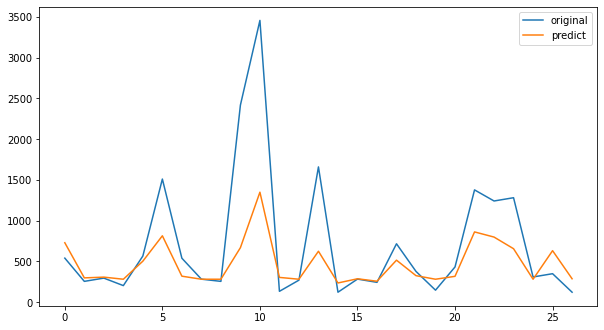

In [33]:
predict.plot(figsize=(10,5.5))

In [34]:
dfx=df_train[(df_train['meal_id']==1971) & (df_train['center_id']==13)]
benedict=xgb_func(dfx)

In [35]:
orig=np.exp(benedict[0].values)
pred=np.exp(benedict[1])

In [36]:
predict=pd.DataFrame([])
predict['original']=orig
predict['predict']=pred

<AxesSubplot:>

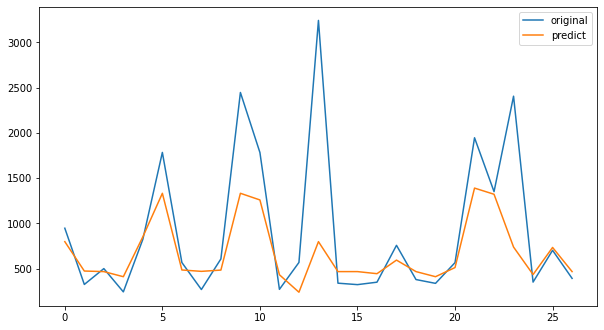

In [37]:
predict.plot(figsize=(10,5.5))

In [38]:
dfx=df_train[(df_train['meal_id']==1971) & (df_train['center_id']==52)]
benedict=xgb_func(dfx)

In [39]:
orig=np.exp(benedict[0].values)
pred=np.exp(benedict[1])

In [40]:
predict=pd.DataFrame([])
predict['original']=orig
predict['predict']=pred

<AxesSubplot:>

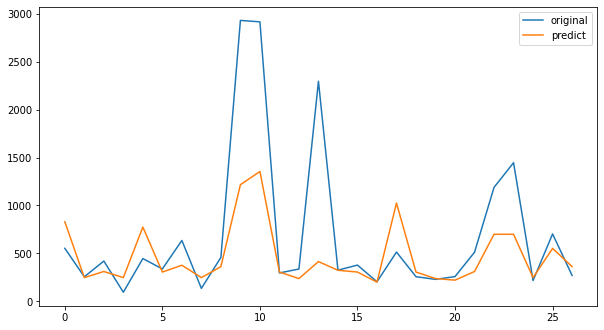

In [41]:
predict.plot(figsize=(10,5.5))

In [42]:
dfx=df_train[(df_train['meal_id']==2760) & (df_train['center_id']==65)]
benedict=xgb_func(dfx)

In [43]:
orig=np.exp(benedict[0].values)
pred=np.exp(benedict[1])

In [44]:
predict=pd.DataFrame([])
predict['original']=orig
predict['predict']=pred

<AxesSubplot:>

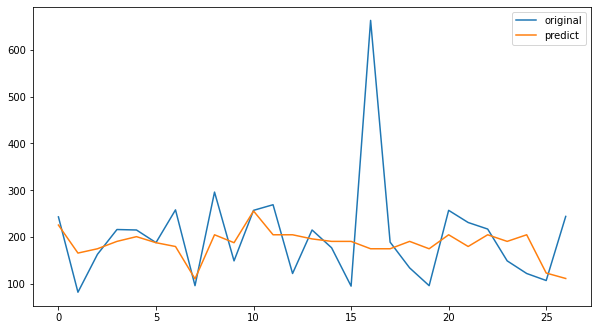

In [45]:
predict.plot(figsize=(10,5.5))